# **Practical 8 - diabetes prediction using machine learning**

# **Name : Sarthak Abhaykumar Nahar**
# Roll No : B-55

Load and Explore the Dataset and libraries

In [21]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.impute import SimpleImputer


In [22]:
# Load dataset

dataset = "diabetes.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(dataset, header=None, names=columns)

In [23]:
# Ensure all columns are numeric and check for any non-numeric values
data = data.apply(pd.to_numeric, errors='coerce')

In [24]:
# Display first few rows of the dataset
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          NaN      NaN            NaN            NaN      NaN   NaN   
1          6.0    148.0           72.0           35.0      0.0  33.6   
2          1.0     85.0           66.0           29.0      0.0  26.6   
3          8.0    183.0           64.0            0.0      0.0  23.3   
4          1.0     89.0           66.0           23.0     94.0  28.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                       NaN   NaN      NaN  
1                     0.627  50.0      1.0  
2                     0.351  31.0      0.0  
3                     0.672  32.0      1.0  
4                     0.167  21.0      0.0  


In [25]:
# Check for missing values
print(data.isnull().sum())

Pregnancies                 1
Glucose                     1
BloodPressure               1
SkinThickness               1
Insulin                     1
BMI                         1
DiabetesPedigreeFunction    1
Age                         1
Outcome                     1
dtype: int64


# **EDA**

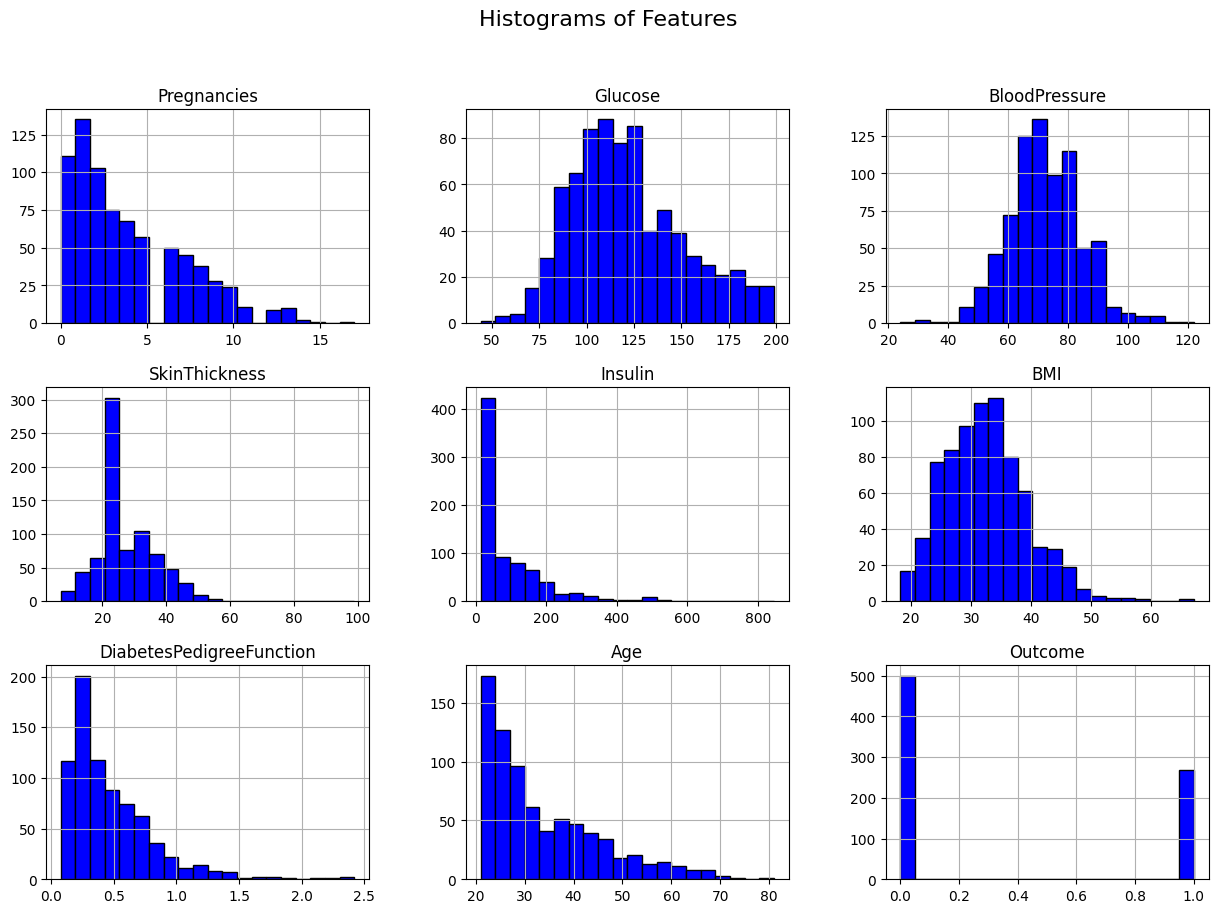

<ipython-input-52-2831cdd12c06>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True, label=column)
<ipython-input-52-2831cdd12c06>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True, label=column)
<ipython-input-52-2831cdd12c06>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True, label=column)
<ipython-input-52-2831cdd12c06>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[column], shade=True, label=column)
<ipython-input-5

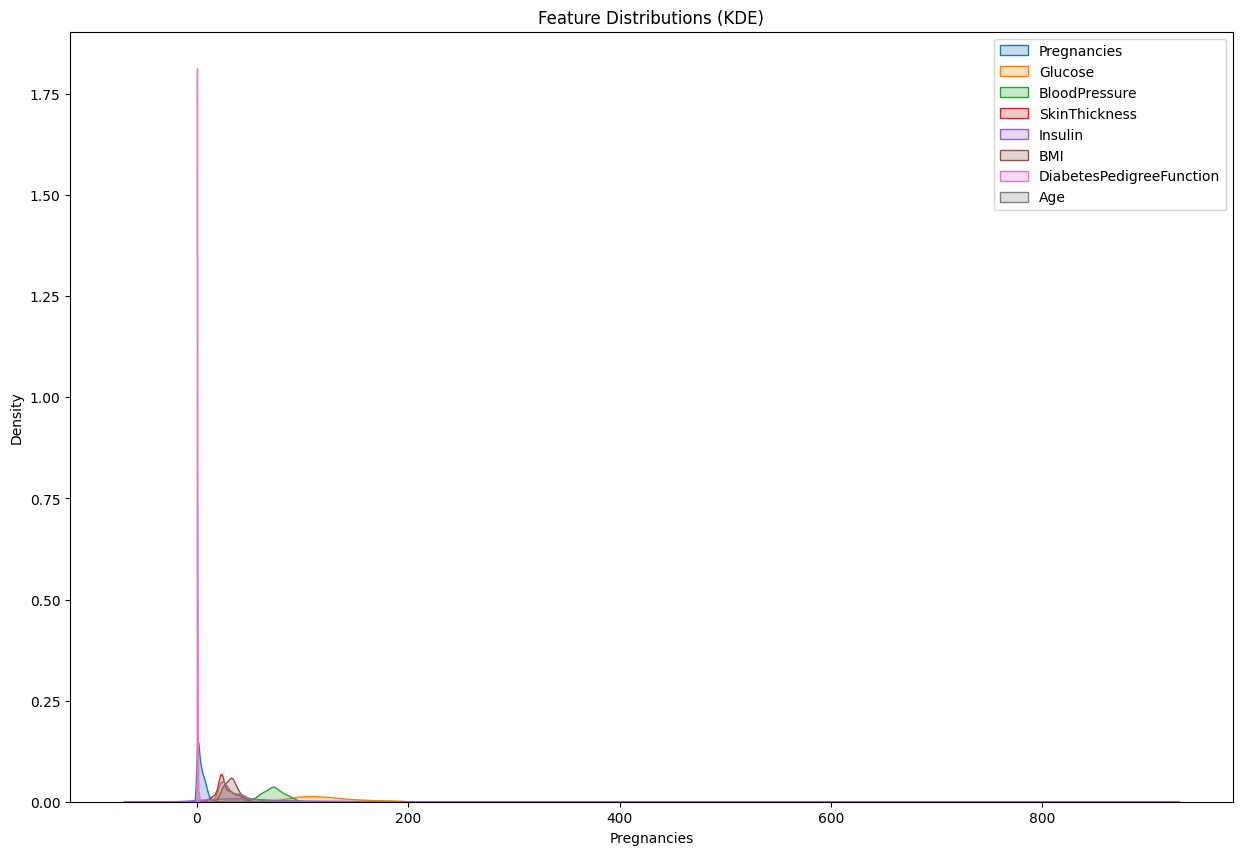

<ipython-input-52-2831cdd12c06>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Outcome'], palette='coolwarm')


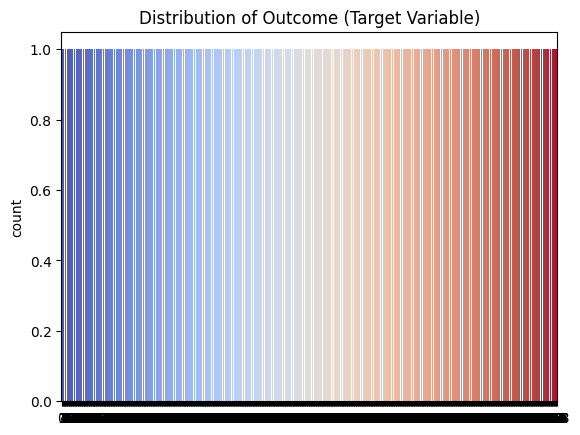

<ipython-input-52-2831cdd12c06>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=column, data=data, palette='coolwarm')
<ipython-input-52-2831cdd12c06>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=column, data=data, palette='coolwarm')
<ipython-input-52-2831cdd12c06>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=column, data=data, palette='coolwarm')
<ipython-input-52-2831cdd12c06>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0

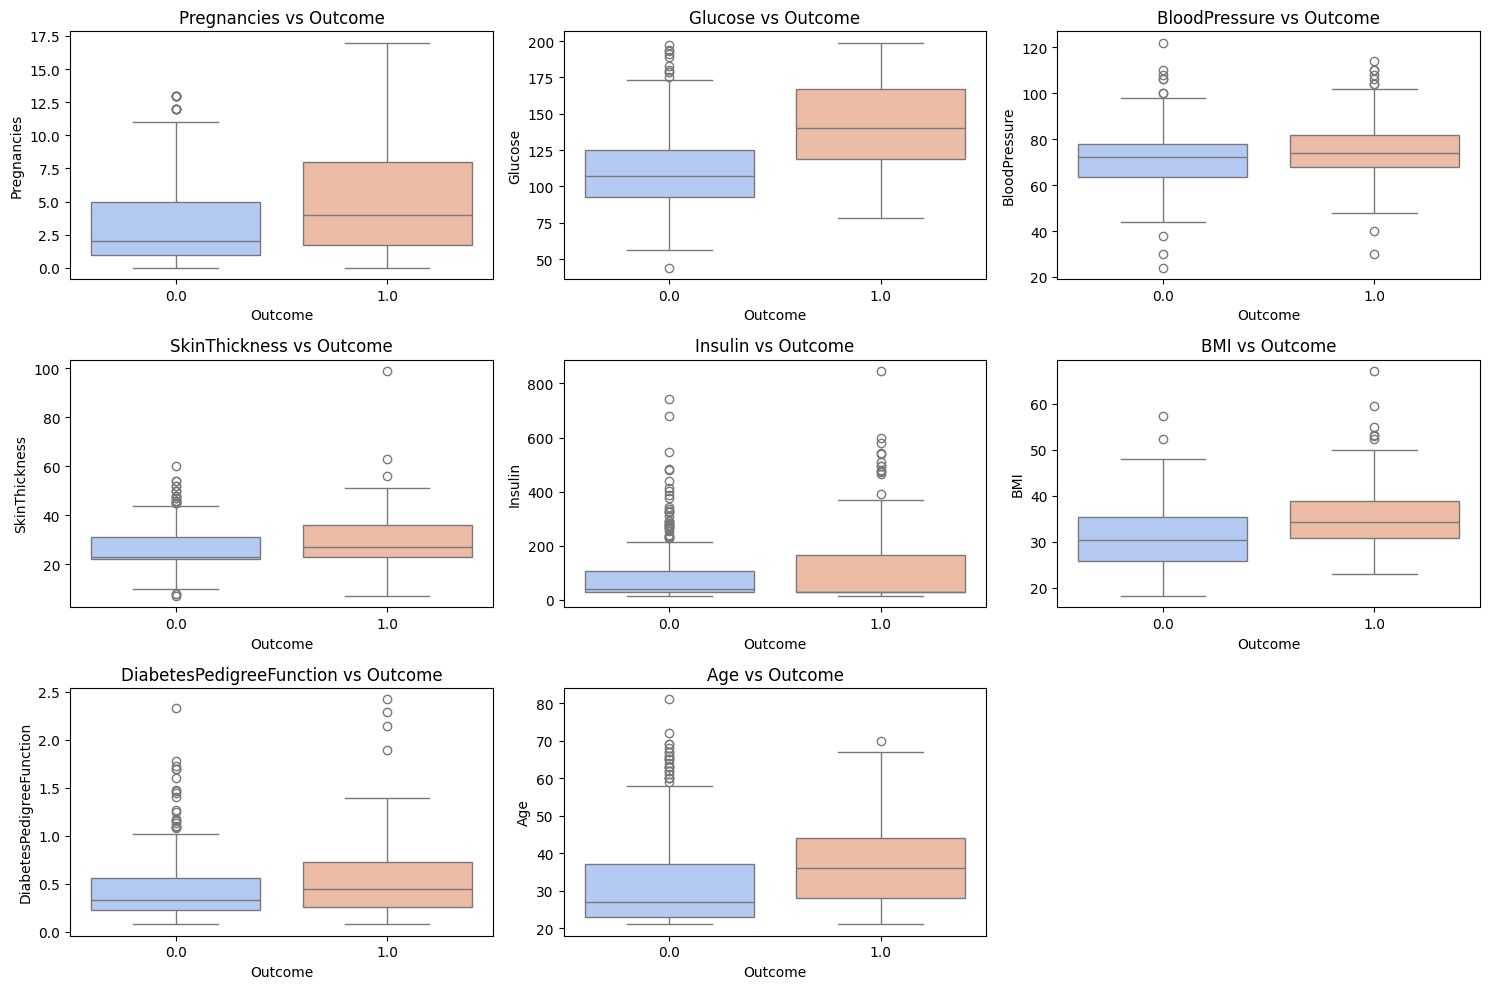

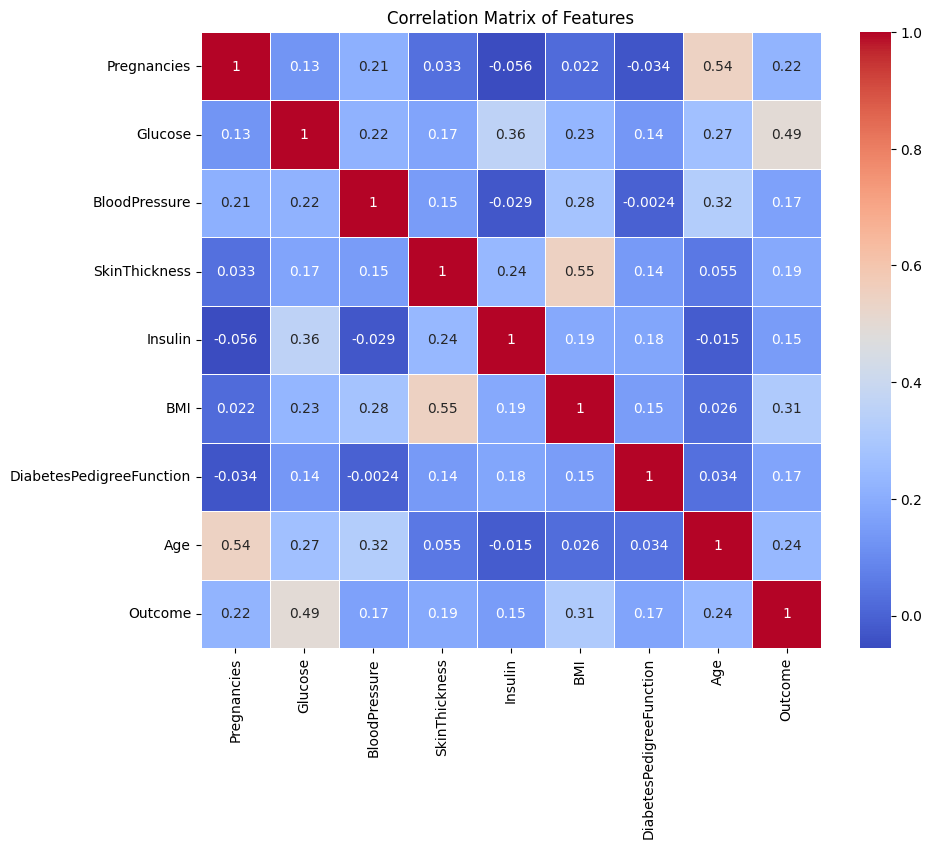

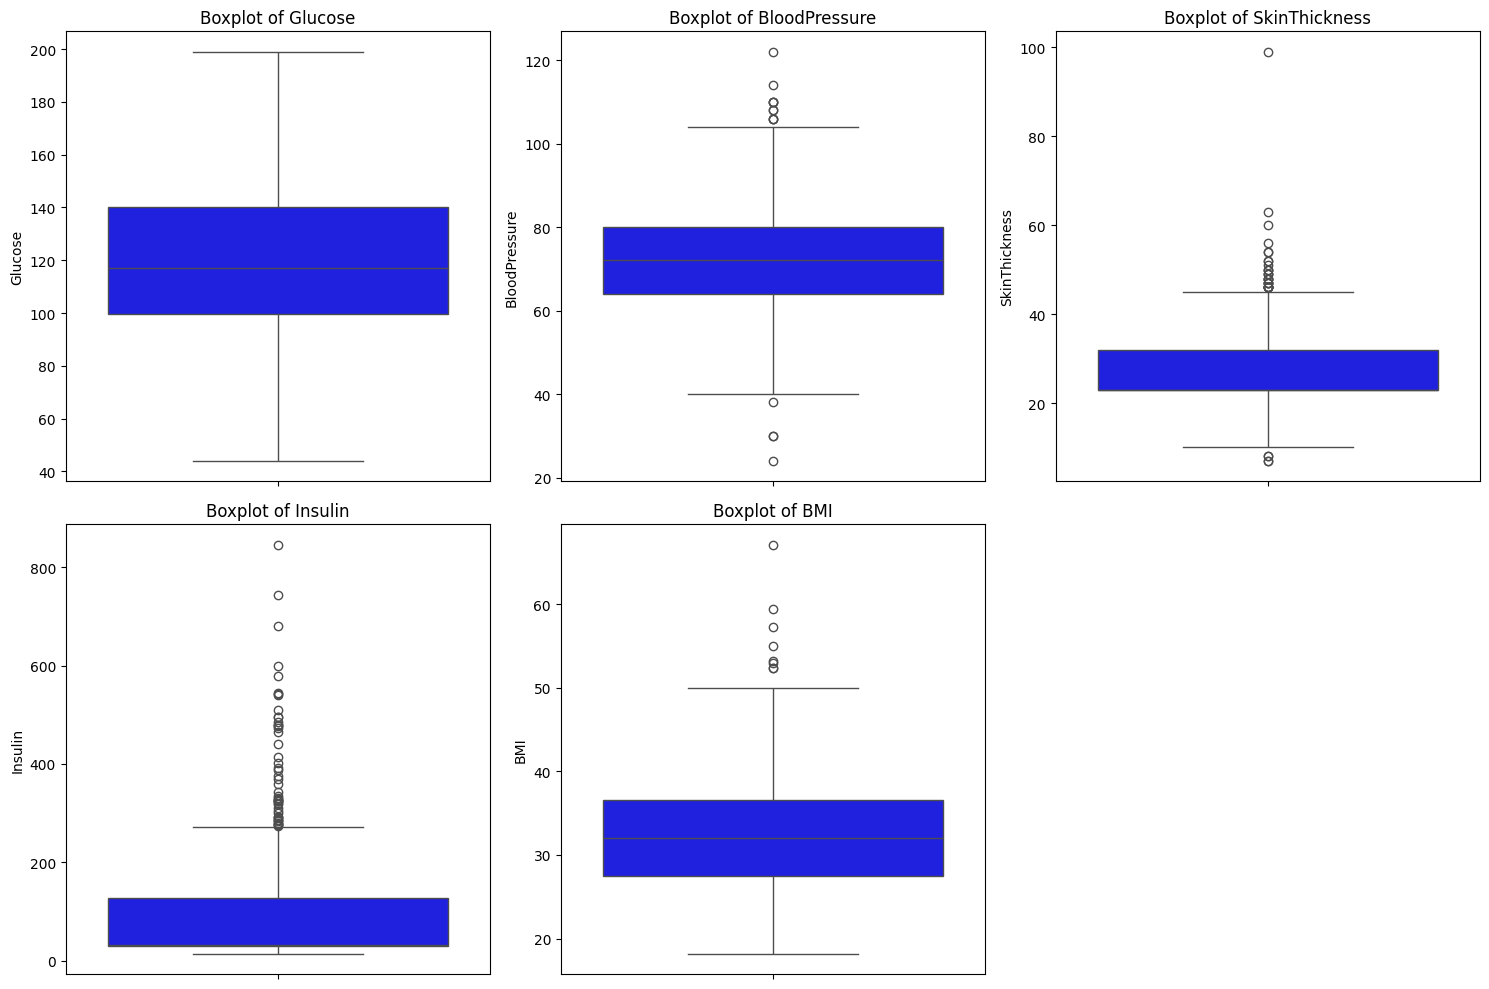

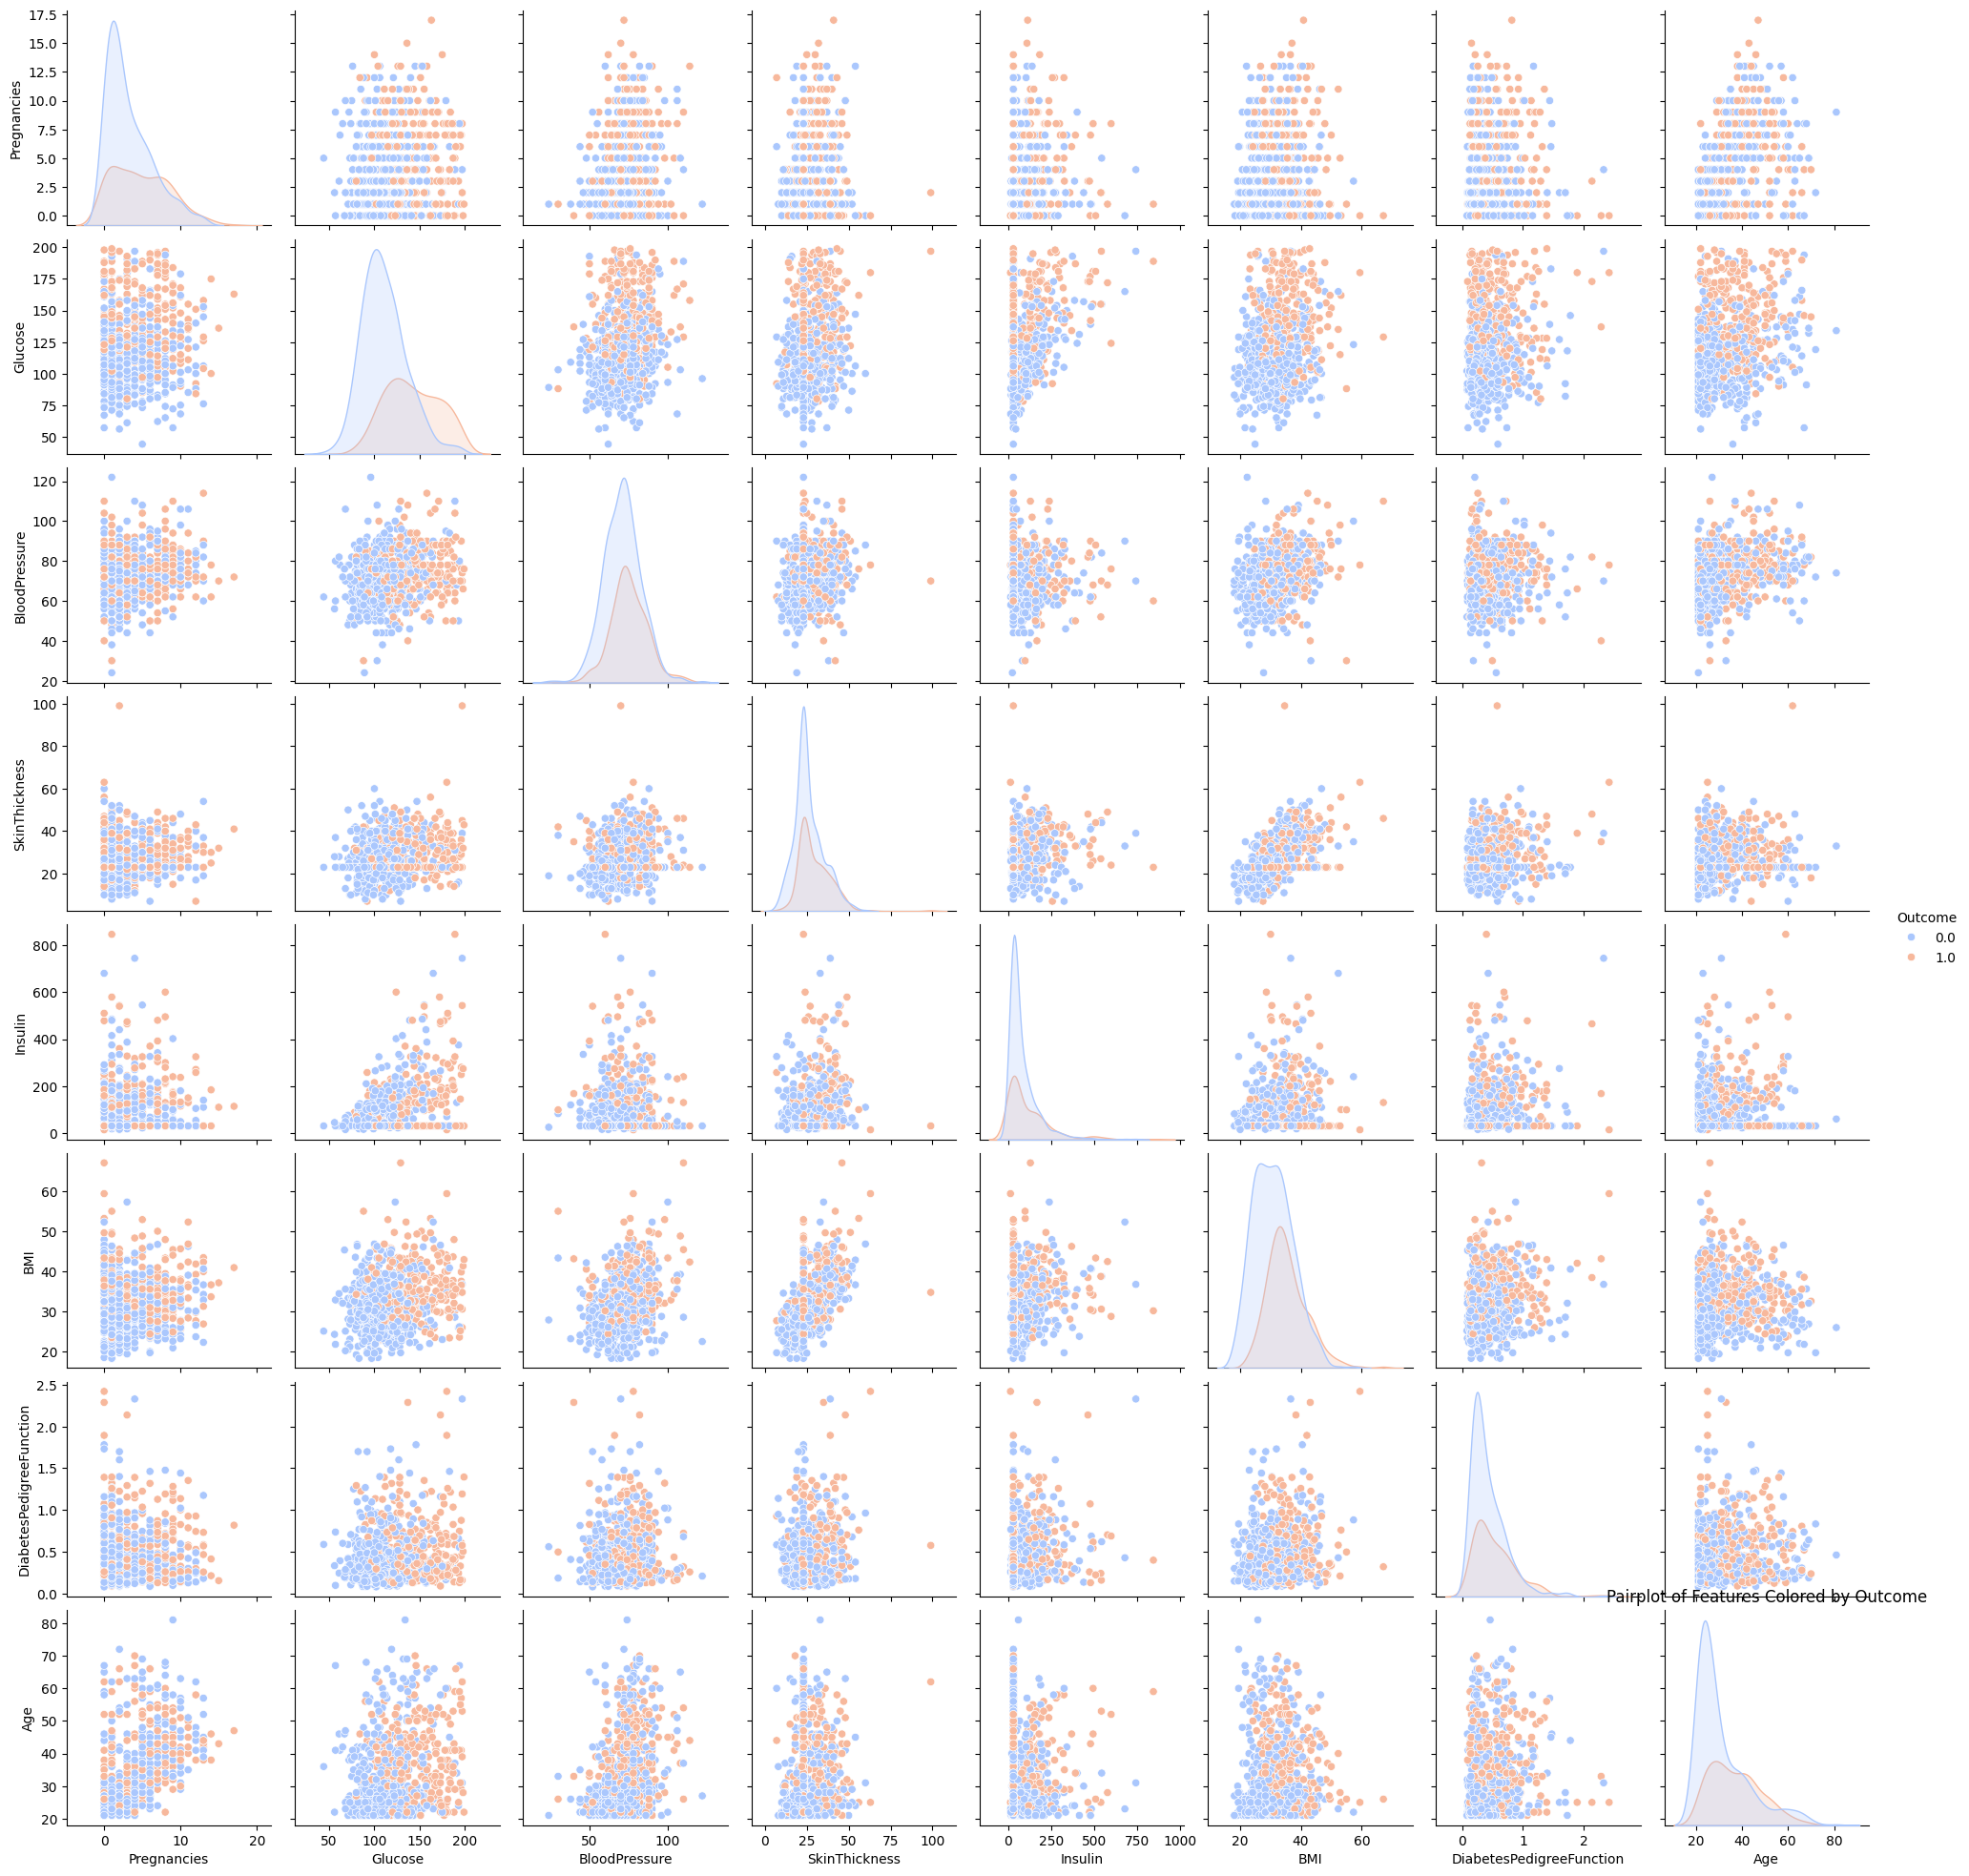

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
data.hist(bins=20, figsize=(15, 10), color='blue', edgecolor='black')
plt.suptitle('Histograms of Features', size=16)
plt.show()

# Kernel Density Estimate (KDE)
plt.figure(figsize=(15, 10))
for column in data.columns[:-1]:  # Exclude 'Outcome'
    sns.kdeplot(data[column], shade=True, label=column)
plt.title("Feature Distributions (KDE)")
plt.legend()
plt.show()

# Step 3: Bivariate Analysis - Feature vs Target (Outcome)
# Distribution of Outcome
sns.countplot(data['Outcome'], palette='coolwarm')
plt.title('Distribution of Outcome (Target Variable)')
plt.show()

# Boxplots for feature-outcome relationships
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[:-1], 1):  # Exclude 'Outcome'
    plt.subplot(3, 3, i)
    sns.boxplot(x='Outcome', y=column, data=data, palette='coolwarm')
    plt.title(f'{column} vs Outcome')
plt.tight_layout()
plt.show()

# Step 4: Correlation Analysis - Heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# Step 5: Outliers Detection - Boxplots
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_with_zeros, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data[column], color='blue')
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# Step 6: Pair Plot - Feature Relationships
sns.pairplot(data, hue='Outcome', palette='coolwarm')
plt.title("Pairplot of Features Colored by Outcome")
plt.show()


# Data Preprocessing

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Replace zero values in specific columns with the median
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_with_zeros:
    data[column] = data[column].replace(0, data[column].median())

# Split the dataset into features (X) and target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [44]:
print(X_train.shape)
print(y_train.shape)


(615, 8)
(615,)


In [45]:
import numpy as np

# Check if any NaN or Inf values in X_train
print(np.any(np.isnan(X_train)))
print(np.any(np.isinf(X_train)))


True
False


In [46]:
print(y_train.unique())
print(y_train.dtypes)


[ 0.  1. nan]
float64


# Train and Compare Classification Models

In [50]:
# Drop rows where the target variable (y) is NaN
data_cleaned = data.dropna(subset=['Outcome'])

# Split the cleaned data into features (X) and target (y)
X = data_cleaned.drop('Outcome', axis=1)
y = data_cleaned['Outcome']

# Handle missing values in the feature data (X)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Impute missing values in the features
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [51]:
# Define a dictionary of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

# Initialize an empty dictionary to store performance metrics
performance_metrics = {}

# Loop through each classifier, fit the model, and compute metrics
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store metrics in the dictionary
    performance_metrics[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    }

# Convert the results to a DataFrame for easy comparison
performance_df = pd.DataFrame(performance_metrics).T
print(performance_df)


                     Accuracy  Precision    Recall  F1-score
Logistic Regression  0.766234   0.679245  0.654545  0.666667
Naive Bayes          0.753247   0.644068  0.690909  0.666667
SVM                  0.753247   0.680851  0.581818  0.627451
K-Nearest Neighbors  0.746753   0.642857  0.654545  0.648649
Decision Tree        0.733766   0.625000  0.636364  0.630631
Random Forest        0.740260   0.641509  0.618182  0.629630
AdaBoost             0.740260   0.631579  0.654545  0.642857


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
